In [1]:
#!usr/bin/python
import numpy as np
from lib import ClassWrap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

#Each run is an instance of PyHEG
run = ClassWrap.PyHEG(rs=3.0, ndim=3, Nk=5)

[-1.27943886 -0.63971943  0.          0.63971943  1.27943886]
[ 0.63971943  1.27943886  1.91915829  2.55887772 -1.91915829 -1.27943886
 -0.63971943  0.        ]
[[ 0.          0.          0.        ]
 [ 0.63971943  0.          0.        ]
 [ 1.27943886  0.          0.        ]
 [ 1.91915829  0.          0.        ]
 [-2.55887772  0.          0.        ]
 [-1.91915829  0.          0.        ]
 [-1.27943886  0.          0.        ]
 [-0.63971943  0.          0.        ]
 [ 0.63971943 -0.63971943  0.        ]
 [ 1.27943886 -0.63971943  0.        ]
 [ 1.91915829 -0.63971943  0.        ]
 [ 2.55887772 -0.63971943  0.        ]
 [-1.91915829 -0.63971943  0.        ]
 [-1.27943886 -0.63971943  0.        ]
 [-0.63971943 -0.63971943  0.        ]
 [ 0.         -0.63971943  0.        ]
 [ 0.63971943  0.         -0.63971943]
 [ 1.27943886  0.         -0.63971943]
 [ 1.91915829  0.         -0.63971943]
 [ 2.55887772  0.         -0.63971943]
 [-1.91915829  0.         -0.63971943]
 [-1.27943886  0.   

## Reproducing figures 2.1 and 2.2 from pages 82, 83 of Guiliani & Vignale, Quantum Theory of the Electron Liquid (2005)


[-0.95957915 -0.47978957  0.          0.47978957  0.95957915]
[ 0.47978957  0.95957915  1.43936872  1.91915829 -1.43936872 -0.95957915
 -0.47978957  0.        ]
[[ 0.          0.          0.        ]
 [ 0.47978957  0.          0.        ]
 [ 0.95957915  0.          0.        ]
 [ 1.43936872  0.          0.        ]
 [-1.91915829  0.          0.        ]
 [-1.43936872  0.          0.        ]
 [-0.95957915  0.          0.        ]
 [-0.47978957  0.          0.        ]
 [ 0.47978957 -0.47978957  0.        ]
 [ 0.95957915 -0.47978957  0.        ]
 [ 1.43936872 -0.47978957  0.        ]
 [ 1.91915829 -0.47978957  0.        ]
 [-1.43936872 -0.47978957  0.        ]
 [-0.95957915 -0.47978957  0.        ]
 [-0.47978957 -0.47978957  0.        ]
 [ 0.         -0.47978957  0.        ]
 [ 0.47978957  0.         -0.47978957]
 [ 0.95957915  0.         -0.47978957]
 [ 1.43936872  0.         -0.47978957]
 [ 1.91915829  0.         -0.47978957]
 [-1.43936872  0.         -0.47978957]
 [-0.95957915  0.   

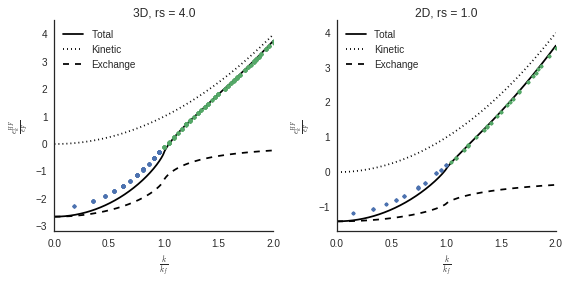

In [2]:
%matplotlib inline
sns.set_style('white')
fig, axes = plt.subplots(1,2,figsize=(8,4))
def row_norm(ary):
    return np.sqrt((ary*ary).sum(axis=1))
scale = 1.2

#3D plot
run.ndim = 3
run.rs = 4.0
run.get_resulting_params()
xmax = 2.0 * run.kf
x = np.linspace(0, xmax, 500)
energy_x = np.array([run.analytic_energy(i) for i in x]) / run.fermi_energy
kinetic_x = np.array([0.5 * i**2 for i in x]) / run.fermi_energy
exch_x = np.array([run.analytic_exch(i) for i in x]) / run.fermi_energy
x = x / run.kf  #rescale for plot
axes[0].plot(x, energy_x, 'k-' , label='Total')
axes[0].plot(x, kinetic_x, 'k:', label='Kinetic')
axes[0].plot(x, exch_x, 'k--', label='Exchange')
axes[0].set_title(str(run.ndim) + 'D, rs = ' + str(run.rs))
axes[0].set_xlabel(r'$\frac{k}{k_f}$')
axes[0].set_ylabel(r'$\frac{\epsilon_k^{HF}}{\epsilon_F}$')
axes[0].set_xlim(0, 2)
axes[0].set_ylim(scale * np.amin(energy_x), scale * np.amax(energy_x))

#add minor ticks
minor_locator = AutoMinorLocator(5)
axes[0].yaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
minor_locator = AutoMinorLocator(5)
axes[0].xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')

#Discretized 3D 
run.Nk = 20
run.get_resulting_params()
y = run.occ_energies / run.fermi_energy
x = row_norm(run.kgrid[run.occ_states]) / run.kf
axes[0].plot(x, y, '.')
y = run.vir_energies / run.fermi_energy
x = row_norm(run.kgrid[run.vir_states]) / run.kf
axes[0].plot(x, y, '.')

print 'ay'

#2D plot
run.ndim = 2
run.rs = 1.0
run.get_resulting_params()
x = np.linspace(0, 2.0 * run.kf, 500)
energy_x = np.array([run.analytic_energy(i) for i in x]) / run.fermi_energy
kinetic_x = np.array([0.5 * i**2 for i in x]) / run.fermi_energy
exch_x = np.array([run.analytic_exch(i) for i in x]) / run.fermi_energy
x = x / run.kf  #rescale for plot

axes[1].plot(x, energy_x, 'k-' , label='Total')
axes[1].plot(x, kinetic_x, 'k:', label='Kinetic')
axes[1].plot(x, exch_x, 'k--', label='Exchange')
axes[1].set_title(str(run.ndim) + 'D, rs = ' + str(run.rs))
axes[1].set_xlabel(r'$\frac{k}{k_f}$')
axes[1].set_ylabel(r'$\frac{\epsilon_k^{HF}}{\epsilon_F}$')
axes[1].set_xlim(0,2)
axes[1].set_ylim(scale * np.amin(energy_x), scale * np.amax(energy_x))

#Discretized 2D 
run.Nk = 20
run.get_resulting_params()
y = run.occ_energies / run.fermi_energy
x = row_norm(run.kgrid[run.occ_states]) / run.kf
axes[1].plot(x, y, '.')
y = run.vir_energies / run.fermi_energy
x = row_norm(run.kgrid[run.vir_states]) / run.kf
axes[1].plot(x, y, '.')

#y2 = run.occ_cyth() / run.fermi_energy
#axes[1,0].plot(x, y2, 'g.', markersize=2)
                                            
#add minor ticks
minor_locator = AutoMinorLocator(5)
axes[1].yaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
minor_locator = AutoMinorLocator(5)
axes[1].xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')

#3D Figure
#image = mpimg.imread("figures/HF_singleparticleenergy_3D_Guiliani2005_fig2.1_cropped.png")
#ntix = 5
#xlabels = np.linspace(0,2,ntix)
#xtix = np.linspace(0, image.shape[0], ntix)
#ntix = 8
#ytix = np.linspace(0, image.shape[1], ntix)
#ylabels = np.linspace(-4,3,ntix)
#axes[0,1].axis('on')
#axes[0,1].imshow(image[::-1,:,:])
#axes[0,1].set_xticks(xtix,minor=False)
#axes[0,1].set_xticklabels(xlabels)
#axes[0,1].set_xlim(0,image.shape[0])
#axes[0,1].set_yticks(ytix)
#axes[0,1].set_yticklabels(ylabels)
#axes[0,1].set_ylim(0,image.shape[1])
#axes[0,1].tick_params(top='off', bottom='off', left='off', right='off')
#axes[0,1].set_xlabel(r'$\frac{k}{k_f}$')
#axes[0,1].set_ylabel(r'$\frac{\epsilon_k^{HF}}{\epsilon_F}$')
#
#
##2D Figure
#image = mpimg.imread("figures/HF_singleparticleenergy_2D_Guiliani2005_fig2.2_cropped.png")
#ntix = 5
#xlabels = np.linspace(0,2,ntix)
#xtix = np.linspace(0, image.shape[0], ntix)
#ntix = 12
#ytix = np.linspace(0, image.shape[1], ntix)
#ylabels = np.linspace(-2.5,3,ntix)
#axes[1,1].axis('on')
#axes[1,1].imshow(image[::-1,:,:])
#axes[1,1].set_xticks(xtix,minor=False)
#axes[1,1].set_xticklabels(xlabels)
#axes[1,1].set_xlim(0,image.shape[0])
#axes[1,1].set_yticks(ytix)
#axes[1,1].set_yticklabels(ylabels)
#axes[1,1].set_ylim(0,image.shape[1])
#axes[1,1].tick_params(top='off', bottom='off', left='off', right='off')
#axes[1,1].set_xlabel(r'$\frac{k}{k_f}$')
#axes[1,1].set_ylabel(r'$\frac{\epsilon_k^{HF}}{\epsilon_F}$')
sns.despine()
axes[0].legend(loc='best')
axes[1].legend(loc='best')
plt.tight_layout()
plt.show()

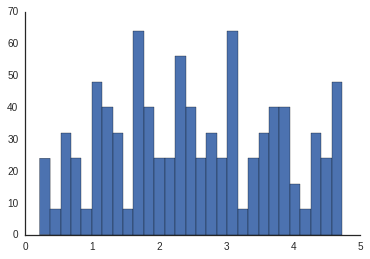

In [3]:
fig = plt.figure()
plt.hist(run.exc_energies, run.Nexc/30)
sns.despine()
plt.show()

In [4]:
#import pstats, cProfile
#run.Nk = 100
#cProfile.runctx("run.occ_cyth()", globals(), locals(), "Profile.prof")
#s = pstats.Stats("Profile.prof")
#s.strip_dirs().sort_stats("time").print_stats()

In [5]:
run.Nk = 5
run.ndim = 2
run.get_resulting_params()

[-2.82842712 -1.41421356  0.          1.41421356  2.82842712]
[ 1.41421356  2.82842712  4.24264069  5.65685425 -4.24264069 -2.82842712
 -1.41421356  0.        ]
[[  0.00000000e+00   0.00000000e+00]
 [  1.41421356e+00   0.00000000e+00]
 [  2.82842712e+00   0.00000000e+00]
 [  4.24264069e+00   0.00000000e+00]
 [ -5.65685425e+00   0.00000000e+00]
 [ -4.24264069e+00   0.00000000e+00]
 [ -2.82842712e+00   0.00000000e+00]
 [ -1.41421356e+00   0.00000000e+00]
 [  1.41421356e+00  -1.41421356e+00]
 [  2.82842712e+00  -1.41421356e+00]
 [  4.24264069e+00  -1.41421356e+00]
 [  5.65685425e+00  -1.41421356e+00]
 [ -4.24264069e+00  -1.41421356e+00]
 [ -2.82842712e+00  -1.41421356e+00]
 [ -1.41421356e+00  -1.41421356e+00]
 [  0.00000000e+00  -1.41421356e+00]
 [  1.41421356e+00   0.00000000e+00]
 [  2.82842712e+00   0.00000000e+00]
 [  4.24264069e+00   0.00000000e+00]
 [  5.65685425e+00   0.00000000e+00]
 [ -4.24264069e+00   0.00000000e+00]
 [ -2.82842712e+00   0.00000000e+00]
 [ -1.41421356e+00   0.00

In [6]:
import sys
print "Nexc = ", run.Nexc
print "Nocc = ", run.Nocc
print "Nvir = ", run.Nvir
print "Symm = ", np.all(np.isclose(run.mattest.T, run.mattest))
a = np.zeros(2*run.Nexc)
a[0] = 1.0
run.vectest = a
run.mv_test()
print 'The matrix'
np.savetxt(sys.stdout, run.mattest, fmt='%5.2f')
print 'builtin'
np.savetxt(sys.stdout, run.vectest1, fmt='%5.2f')
print 'custom'
np.savetxt(sys.stdout, run.vectest2, fmt='%5.2f')

Nexc =  14
Nocc =  5
Nvir =  10
Symm =  True
The matrix
 4.03  0.00  0.00  0.00  0.00 -0.14  0.00  0.00 -0.14  0.00 -0.07  0.00  0.00 -0.07 -0.07 -0.00 -0.00 -0.07 -0.00 -0.06 -0.00 -0.00 -0.06 -0.00 -0.05 -0.00 -0.00 -0.05
 0.00  0.90  0.00  0.00 -0.10  0.00  0.00 -0.10  0.00  0.00  0.00 -0.07  0.00  0.00 -0.00 -0.00 -0.14 -0.00 -0.00 -0.00 -0.06 -0.00 -0.00 -0.06 -0.00 -0.00 -0.06 -0.00
 0.00  0.00  0.90  0.00  0.00  0.00 -0.10  0.00  0.00 -0.10  0.00  0.00 -0.07  0.00 -0.00 -0.14 -0.00 -0.00 -0.06 -0.00 -0.00 -0.06 -0.00 -0.00 -0.00 -0.06 -0.00 -0.00
 0.00  0.00  0.00  4.03  0.00 -0.14  0.00  0.00 -0.14  0.00 -0.07  0.00  0.00 -0.07 -0.07 -0.00 -0.00 -0.07 -0.00 -0.06 -0.00 -0.00 -0.06 -0.00 -0.05 -0.00 -0.00 -0.05
 0.00 -0.10  0.00  0.00  2.93  0.00  0.00  0.00  0.00  0.00  0.00 -0.10  0.00  0.00 -0.00 -0.00 -0.06 -0.00 -0.00 -0.00 -0.14 -0.00 -0.00 -0.14 -0.00 -0.00 -0.06 -0.00
-0.14  0.00  0.00 -0.14  0.00  4.09  0.00  0.00  0.00  0.00 -0.14  0.00  0.00 -0.14 -0.06 -0.00 -0.00 -0

In [7]:
print run.vir_states
print run.excitations

[[0 1]
 [1 1]
 [3 1]
 [4 1]
 [0 2]
 [4 2]
 [0 3]
 [1 3]
 [3 3]
 [4 3]]
[[1 0]
 [1 1]
 [1 2]
 [1 3]
 [0 4]
 [2 4]
 [4 4]
 [0 5]
 [2 5]
 [4 5]
 [3 6]
 [3 7]
 [3 8]
 [3 9]]


In [8]:
print run.inv_exc_map_test

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
